In [2]:
#import module
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer

import re
import json
import datetime, time
import pytz
import numpy as np
import matplotlib.pyplot as plt

file_dir = "/Users/NickyMc/Desktop/5/ECE219_tweet_data/tweets_#superbowl.txt"

from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyze_senti=SentimentIntensityAnalyzer()

#read file
read_file= open(file_dir)

In [3]:
#Get data clusters based on team keywords (partially herited from 3_1)
def get_senti(line):
    current_senti = analyze_senti.polarity_scores(line)
    return current_senti['compound']

def time_senti(file_lines):
    time_1 = []
    time_2 = []
    score_1 = []
    score_2 = []
    
    for line in file_lines.readlines():
        splited = json.loads(line)
        hometeam = splited["tweet"]["text"]
        fan_hawks = in_team(hometeam,['gohawks','seahawks','go hawks'])
        fan_pats = in_team(hometeam,['gopatriots','patriots','go patriots'])
        if fan_hawks:
            rating = get_senti(splited["tweet"]["text"])
            score_1.append(rating)
            time_1.append(splited["citation_date"])
        if fan_pats:
            rating = get_senti(splited["tweet"]["text"])
            score_2.append(rating)
            time_2.append(splited["citation_date"])
    file_lines.close()
    return score_1, score_2, time_1, time_2

def pac_obtain(first_state_time,second_state_time):
    time_1 = []
    time_2 = []
    for item in first_state_time:
        current = datetime.datetime.fromtimestamp(item, set_zone).replace(tzinfo=None)
        time_1.append(current)
    for item in second_state_time:
        current = datetime.datetime.fromtimestamp(item, set_zone).replace(tzinfo=None)
        time_2.append(current)
    return time_2, time_1
    
def plot_sent_graph(json_file_name):
    f = open(json_file_name, errors = 'ignore')
    
    score_wa, score_ma, time_list_wa, time_list_ma = time_senti(f)
    ma_pac, wa_pac = pac_obtain(time_list_wa,time_list_ma)
    
    return ma_pac, score_ma, wa_pac, score_wa

def in_team(hometeam,include):
    hometeam = hometeam.replace(',','')
    hometeam = hometeam.split()
    for item in include:
        if item.lower() in hometeam:
            return True
    return False




In [4]:
set_zone = pytz.timezone("US/Pacific")

ma_pac, score_ma, wa_pac, score_wa = plot_sent_graph(file_dir)



4341
2038
4341
2038


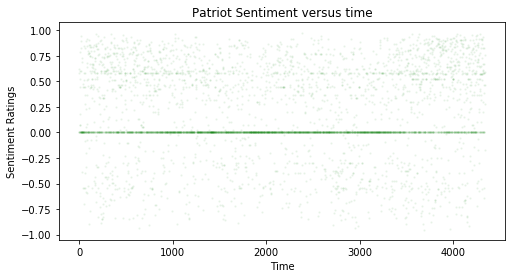

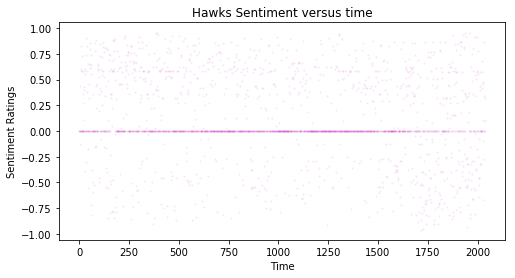

In [5]:
#Plot the graph based on the info obtained above

len_ma_pac = np.arange(len(ma_pac))
len_wa_pac = np.arange(len(wa_pac))

print (len(ma_pac))
print (len(wa_pac))
print (len(score_ma))
print (len(score_wa))



plt.figure(1,figsize=(8, 4))
plt.scatter(len_ma_pac, score_ma, c=None, marker=None, cmap=None, norm=None, alpha = 0.05, s=2, color = 'g')

plt.title("Patriot Sentiment versus time")
plt.xlabel("Time")
plt.ylabel("Sentiment Ratings")


plt.figure(2,figsize=(8, 4))
plt.scatter(len_wa_pac, score_wa, c=None, marker=None, cmap=None, norm=None, alpha = 0.05, s=2,color = 'm')

plt.title("Hawks Sentiment versus time")
plt.xlabel("Time")
plt.ylabel("Sentiment Ratings")

plt.show()
